#Linear Algebra

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn import preprocessing 

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

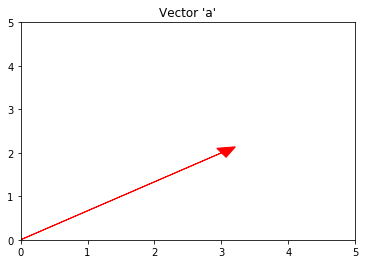

In [2]:
vector_a = [3, 2]
plt.arrow(0,0, vector_a[0], vector_a[1], head_width=0.25, head_length=0.25, color='red')
plt.axis([0, 5, 0, 5])
plt.title("Vector 'a'");

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [3]:
vector_b = [17, -4, -2, 1]
print ("The norm of vector 'b' is", np.linalg.norm(vector_b))
print ('\n')
print ("A vector's magnitude or 'norm' is its length is space")

The norm of vector 'b' is 17.60681686165901


A vector's magnitude or 'norm' is its length is space


## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [4]:
vector_c = [3, 7, -2, 12]
vector_d = [9, -7, 4, 6]

dot_prod_cd = np.dot(vector_c, vector_d)
print ("The dot product of vectors 'c' and 'd' is", dot_prod_cd)

The dot product of vectors 'c' and 'd' is 42


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [5]:
matrix_E = np.array([[7, 4, 2],
                    [1, 3, -1],
                    [2, 6, -4]])


inv_matrix_E = np.linalg.inv(matrix_E)

transpose_matrix_E = matrix_E.T

print ("The inverse of matrix 'E':")
print ('\n')
print(inv_matrix_E)
print ('\n')
print ("The transpose of matrix 'E':")
print ('\n')
print(transpose_matrix_E)

The inverse of matrix 'E':


[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


The transpose of matrix 'E':


[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [6]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [7]:
cust_mean = df.customers.mean()
cust_var = df.customers.var()
cust_std = df.customers.std()

snow_mean = df.snow.mean()
snow_var = df.snow.var()
snow_std = df.snow.std()

print ('The mean number of customers was', cust_mean)
print ('The variance of customers was', cust_var)
print ('The standard deviation of customers was', cust_std)
print ('\n')
print ('The mean number of inches of snowfall was', snow_mean)
print ('The variance of inches of snowfall was', snow_var)
print ('The standard deviation of inches of snowfall was', snow_std)

The mean number of customers was 1135.7142857142858
The variance of customers was 98761.90476190478
The standard deviation of customers was 314.26406851866597


The mean number of inches of snowfall was 2.7142857142857144
The variance of inches of snowfall was 8.571428571428571
The standard deviation of inches of snowfall was 2.9277002188455996


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [8]:
# Not really, because variance is represented as squared units of the mean and is therefore 
# more difficult to compare across different populations

# I believe you would have to use a Fisher's F Test to compare variances of different populations

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [9]:
var_covar_matrix = df.cov()
var_covar_matrix

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


##  Plotting Customers and Snow 

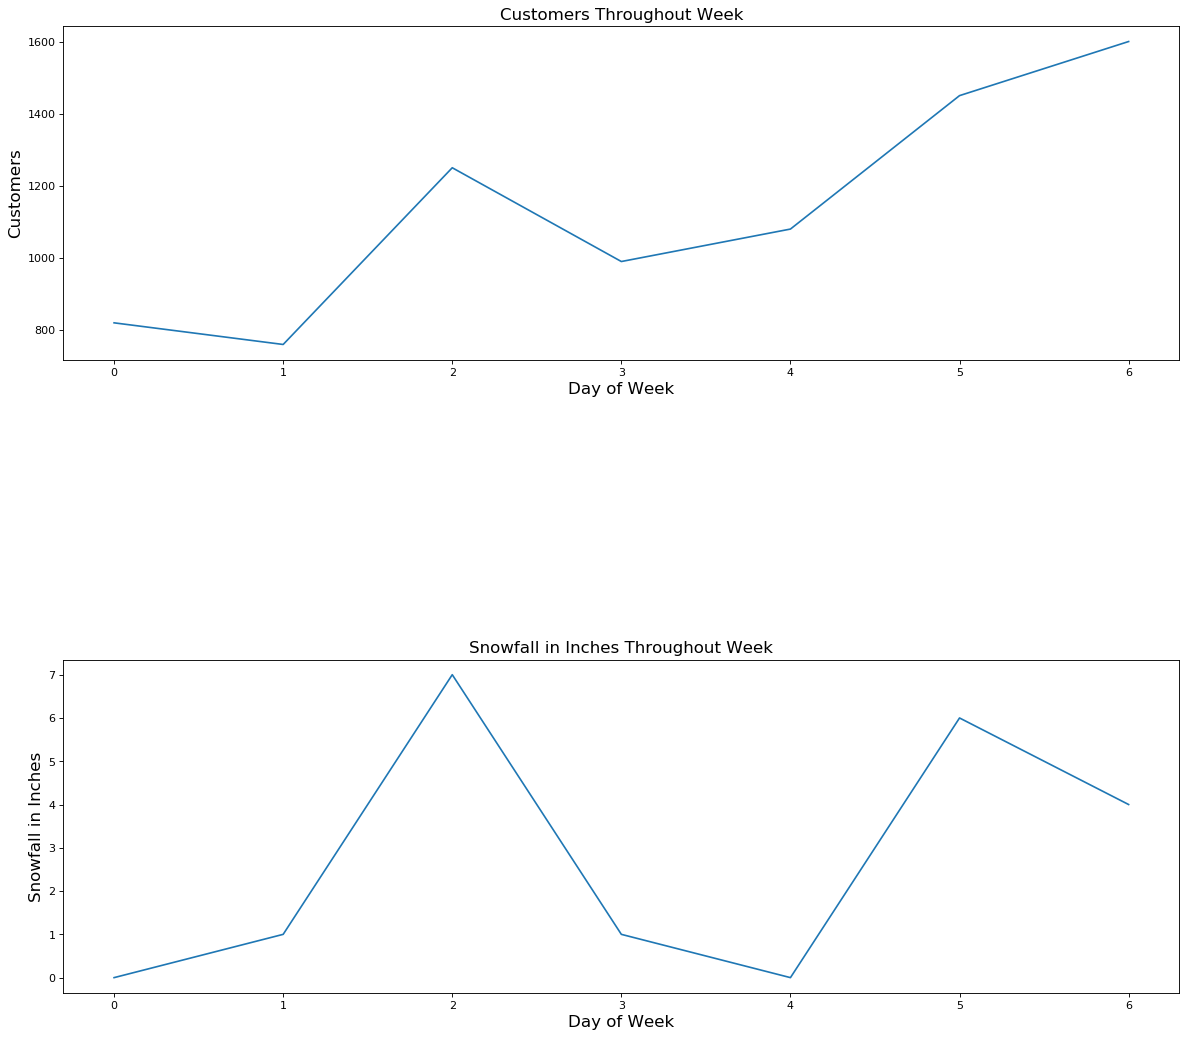

In [10]:
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2,1,1)
plt.plot(df.index, df.customers)
plt.title('Customers Throughout Week', fontsize=15)
plt.xlabel('Day of Week', fontsize=15)
plt.ylabel('Customers', fontsize=15)
plt.tick_params(axis='both',which='major', labelsize=10)

plt.subplot(2,1,2)
plt.plot(df.index, df.snow)
plt.title('Snowfall in Inches Throughout Week', fontsize=15)
plt.xlabel('Day of Week', fontsize=15)
plt.ylabel('Snowfall in Inches', fontsize=15)
plt.tick_params(axis='both',which='major', labelsize=10)
plt.subplots_adjust(hspace=.9)

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [19]:
# Let me get you some data to start you off.

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}


pub_df = pd.DataFrame(data)
pub_df = pub_df.drop('Country', axis='columns')
# Look at the data
pub_df.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [25]:
pub_df_scaled = preprocessing.scale(pub_df)




/anaconda2/envs/py3k/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [27]:
print ('means after scaling')
pub_df_scaled.mean()
# So in other words..... it is 0 

means after scaling


3.2653618371328133e-18

In [29]:
print ('Standard deviation after scaling')
pub_df_scaled.std()

Standard deviation after scaling


1.0

In [30]:
pub_df_scaled

array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

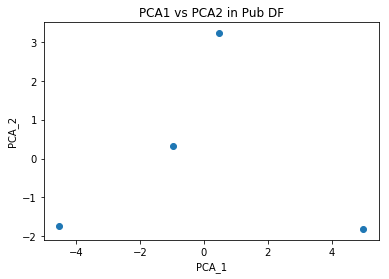

In [54]:

pca = PCA(n_components=2, svd_solver='full')
pub_fitted = pca.fit(pub_df_scaled).components_
pca_results=pca.transform(pub_df_scaled)
pca_results = np.array(pca_results)
pca_df = pd.DataFrame(pca_results)

pca_df['PCA_1'] = pca_df[0]
pca_df['PCA_2'] = pca_df[1]

pca_df = pca_df.drop(0, axis=1)
pca_df = pca_df.drop(1, axis=1)



plt.scatter(x=pca_df['PCA_1'], y=pca_df['PCA_2'])
plt.title('PCA1 vs PCA2 in Pub DF')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()

In [55]:
pca_df

,PCA_1,PCA_2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [57]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()
print (points.shape)

(200, 2)


In [85]:
kmeans_range = range(1,15)
kmeans = KMeans(n_clusters=1)
kmeans.fit(points)
labels = kmeans.labels_

In [86]:
#for i in kmeans_range:
#    n_k = i
#    kmeans = KMeans(n_clusters=n_k)
#    kmeans.fit(points)
#    print (kmeans.labels_)

In [87]:
sum_squared_distances=[]
for k in kmeans_range:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_squared_distances.append(km.inertia_)

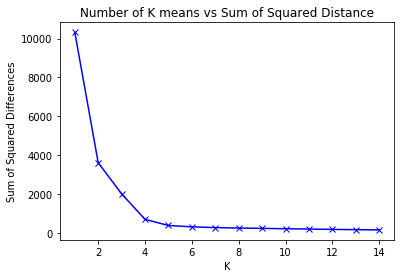

In [88]:
plt.plot(kmeans_range, sum_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum of Squared Differences')
plt.title('Number of K means vs Sum of Squared Distance')
plt.show();


# I would say this plot makes it look like 5 clusters is the way to go 

In [91]:
means_5 = KMeans(n_clusters=5)
means_5.fit(points)
labels = means_5.labels_
new_series = pd.Series(labels)
points['Clusters'] = new_series.values

In [132]:
#points

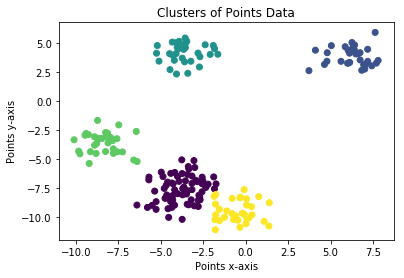

In [123]:
plt.scatter(x=points.x, y= points.y, c=points.Clusters)
plt.title('Clusters of Points Data');
plt.xlabel('Points x-axis')
plt.ylabel('Points y-axis')

plt.show();

# Wow, when you look at it like this, you can tell the 5 clusters suggested
# by the elbow chart definitely did the trick. 
# There is a slight improvement from 4 to 5, and I bet that is the separation 
# of the purple and yellow clusters. 

In [122]:
import seaborn as sns


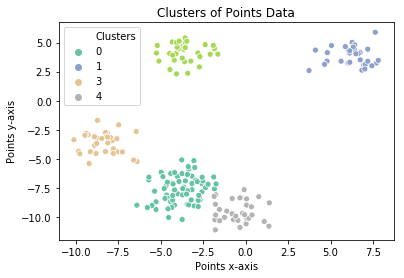

In [131]:
sns.scatterplot(x=points.x, y= points.y, hue=points.Clusters, palette='Set2')
plt.title('Clusters of Points Data');
plt.xlabel('Points x-axis')
plt.ylabel('Points y-axis')


plt.show();

# Beautiful